In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SP_url = "Resources/MSFT.csv"
tweet_url = "TweetSentiment.csv"

In [3]:
SP_df = pd.read_csv(SP_url)
Tweet_df = pd.read_csv(tweet_url)
# SP_df.head()
# Tweet_df.head()

In [4]:
Tweet_df['tweetdate'] = pd.to_datetime(Tweet_df['tweetdate'])

In [5]:
SP_df['Date'] = pd.to_datetime(SP_df['Date'])

In [6]:
merged_df = pd.merge(SP_df, Tweet_df, how='inner', left_on='Date', right_on='tweetdate')
merged_df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,tweetdate,compound,neg,neu,pos
1,2018-01-03,86.059998,86.510002,85.970001,86.349998,83.643845,26061400,Positive,0.400001,0.465388,0.760003,2018-01-03,0.113950,0.094750,0.782750,0.122500
2,2018-01-04,86.589996,87.660004,86.570000,87.110001,84.380028,21912000,Positive,0.760003,0.880142,1.080001,2018-01-04,-0.029990,0.113300,0.779300,0.107300
3,2018-01-05,87.660004,88.410004,87.430000,88.190002,85.426178,23407100,Positive,1.080001,1.239813,0.089997,2018-01-05,-0.083683,0.072833,0.851667,0.075833
4,2018-01-08,88.199997,88.580002,87.599998,88.279999,85.513359,22113000,Positive,0.089997,0.102049,-0.059998,2018-01-08,0.169057,0.062143,0.839000,0.099000
5,2018-01-09,88.650002,88.730003,87.860001,88.220001,85.455238,19484300,Positive,-0.059998,-0.067963,-0.400001,2018-01-09,0.734500,0.037000,0.716400,0.246600
6,2018-01-10,87.860001,88.190002,87.410004,87.820000,85.067780,18652200,Positive,-0.400001,-0.453413,0.260002,2018-01-10,0.365000,0.064800,0.733400,0.201800
7,2018-01-11,88.129997,88.129997,87.239998,88.080002,85.319633,17808900,Positive,0.260002,0.296062,1.519996,2018-01-11,0.046188,0.140000,0.735625,0.124375
8,2018-01-12,88.669998,89.779999,88.449997,89.599998,86.791992,24271500,Positive,1.519996,1.725699,-1.250000,2018-01-12,0.276686,0.092429,0.746643,0.160929
9,2018-01-16,90.099998,90.790001,88.010002,88.349998,85.581161,36599700,Negative,-1.250000,-1.395089,1.790001,2018-01-16,0.090029,0.107765,0.745118,0.147118
10,2018-01-17,89.080002,90.279999,88.750000,90.139999,87.315063,25621200,Positive,1.790001,2.026034,-0.040001,2018-01-17,0.617520,0.037400,0.727600,0.235000


In [7]:
df = merged_df[['neg', 'neu', 'pos', 'P/N']]
df.head()

,neg,neu,pos,P/N
0,0.080154,0.709692,0.210231,Positive
1,0.094750,0.782750,0.122500,Positive
2,0.113300,0.779300,0.107300,Positive
3,0.072833,0.851667,0.075833,Positive
4,0.062143,0.839000,0.099000,Positive


In [8]:
from sklearn.preprocessing import LabelEncoder
# One Hot encoding
# Step 0: Reformat data
data = df.values
X = data[:, 0:3]
y = data[:, 3]

# # Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)

Using TensorFlow backend.


In [10]:
from sklearn.model_selection import train_test_split
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y)

In [11]:
clf = RandomForestClassifier(random_state=100)

In [12]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  52.800000000000004


In [14]:
model.score(X_train, y_train)

0.952

In [15]:
importances = model.feature_importances_
importances

array([0.33021569, 0.35031824, 0.31946607])

In [16]:
sorted(zip(model.feature_importances_, df['P/N']), reverse=True)

[(0.35031824133684275, 'Positive'),
 (0.33021568845132376, 'Positive'),
 (0.3194660702118335, 'Positive')]

In [17]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.55      0.43      0.49        60
           1       0.62      0.62      0.62        65

   micro avg       0.59      0.53      0.56       125
   macro avg       0.58      0.52      0.55       125
weighted avg       0.59      0.53      0.55       125
 samples avg       0.53      0.53      0.53       125



C:\Users\David\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [18]:
merged_df = merged_df.rename(columns={'Daily_%_Change': 'Perc_Change'})

In [19]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Perc_Change,Future_Change,tweetdate,compound,neg,neu,pos
0,2018-01-02,86.129997,86.309998,85.500000,85.949997,83.256378,22483800,Positive,NaN,NaN,0.400001,2018-01-02,0.567400,0.080154,0.709692,0.210231
1,2018-01-03,86.059998,86.510002,85.970001,86.349998,83.643845,26061400,Positive,0.400001,0.465388,0.760003,2018-01-03,0.113950,0.094750,0.782750,0.122500
2,2018-01-04,86.589996,87.660004,86.570000,87.110001,84.380028,21912000,Positive,0.760003,0.880142,1.080001,2018-01-04,-0.029990,0.113300,0.779300,0.107300
3,2018-01-05,87.660004,88.410004,87.430000,88.190002,85.426178,23407100,Positive,1.080001,1.239813,0.089997,2018-01-05,-0.083683,0.072833,0.851667,0.075833
4,2018-01-08,88.199997,88.580002,87.599998,88.279999,85.513359,22113000,Positive,0.089997,0.102049,-0.059998,2018-01-08,0.169057,0.062143,0.839000,0.099000


In [20]:
Ser = pd.Series(model.predict(X).ravel())

In [21]:
merged_df['strategy_returns'] = merged_df.Perc_Change.shift(-1)* Ser

In [22]:
dataset_length = merged_df.shape[0]

split = int(dataset_length * 0.75)
split

375

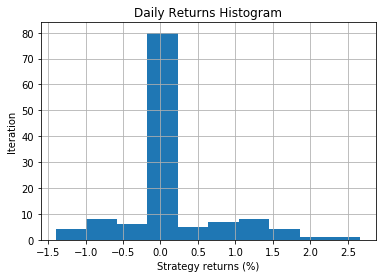

In [84]:
merged_df.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.ylabel('Iteration')
plt.title('Daily Returns Histogram')
plt.savefig("img/MSFT_daily_returns.svg", format="svg")
plt.show()

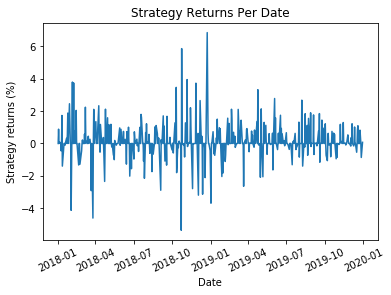

In [88]:
# The output displays the strategy returns and daily returns according to the code for the Random Forest Classifier.
x = merged_df.Date
y = merged_df.strategy_returns
plt.plot(x,y)
plt.title('Strategy Returns Per Date')
plt.ylabel('Strategy returns (%)')
plt.xlabel('Date')
plt.xticks(rotation=25)
plt.savefig("img/MSFT_strategy_returns.svg", format="svg")
plt.show()

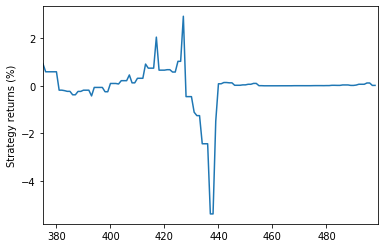

In [83]:
(merged_df.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

In [26]:
# save the model to disk
filename = 'MSFT_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [27]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.528
